# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: Sequence Classification

Note 1: If you don't know how to run jupyter on the Prince cluster, here is another step-by-step guide here: 
<a href='https://docs.google.com/document/d/1HIdtzqJ6-RpsV0z2Gf5iXphNBTRca1kHZPlyqFxKpWs/edit?usp=sharing'> **Running Jupyter on the Cluster **</a>

Note 2: If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload and Submit your final jupyter notebook file in newclasses.nyu.edu

Submission deadline: Tuesday April 10th 2018 (3pm, before class)



# Question 1: Literature Review for Sequence Classification: DeepBind (Total points 20 + 20 Bonus points)

Read this paper:

#### Babak Alipanahi1, Andrew Delong, Matthew T Weirauch & Brendan J Frey, *"Predicting the sequence specificities of DNA- and RNA-binding proteins by deep learning"* Nature Biotechnology, 2015  https://www.nature.com/articles/nbt.3300.pdf

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section **Training DeepBind and scoring sequences**. How do the authors define the **binding score, f(s)** on a given sequence? Write the formula here, and describe in your own words, in a few sentences, how the score is computed for each sequence (s)?


Answer:

The binding scores comes from $f(s)=net_w(pool(rect_b(conv_m(s))))$, which is the following:
Input is transformed through conv_m layer, then Relu, then a pooling layer (max and average), and then a fully connected layer. 

**1.2) (5 points)** What is the loss function that they are optimizing?

Answer:

The task is a binary classification for predicting binding likelihood, and one of the loss functions used in the paper is cross entropy (or log likelihood) for predicted 0/1 labels and the ground truth. There's a second correct answer which is mean square error for binding affinity.

**1.3) (5 points)** What is the evaluation criteria based on which the authors do their cross validation? (Hint: Check Figure 2).

Answer: 

Area Under ROC curve (AUC)

**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used and wasn't? (Go back to Lecture 7 or Chapter 7 of your book for more info.)

Answer:

Already used techniques include dropout, weight decay, and early stopping.

Can add:

Augmentation by randomly changing the one-hot label for each position, to be robust to sequencing errors.

Augmentation via adversarial example generation.

Augmentation by clipping the sequences randomly (i.e. random crops)

Adding batch-normalization to the architecture

**1.5) (Bonus maximum 20 points)**. What other architectures would you try? For each family of models, please do a literature search and see if a paper on that architecture for the task of DNA binding detection has been published

Answer:

First group of architectures: Multi-layered Convolutional models

Second group of architectures: LSTM or GRU or Bidirectional LSTM models

Third group of architectures: Attention model

Fourth group of architectures: Mix of convolutional and RNN models. Convolution can infer motifs and LSRM can infer interactions between them that might be due to 3D shape of the RNN sequences.

Bonus Papers(Thanks to student's good finds!)

+ Convolutional Kernel Network (CKNs)
  + [Morrow, Alyssa, et al. "Convolutional Kitchen Sinks for Transcription Factor Binding Site Prediction." arXiv preprint arXiv:1706.00125 (2017).](https://arxiv.org/pdf/1706.00125.pdf)
  
+ Long Short Term Memory Networks (LSTMs)
  + [Lanchantin, Jack, Ritambhara Singh, and Yanjun Qi. "Memory Matching Networks for Genomic Sequence Classification." arXiv preprint arXiv:1702.06760 (2017).](https://openreview.net/pdf?id=ryh9ZySFg)
  
+ Convolutional Neural Network feeding into a Long Short Term Memory Network
  + [Qu, Yu-Hui, et al. "On the prediction of DNA-binding proteins only from primary sequences: A deep learning approach." PloS one 12.12 (2017): e0188129.](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0188129)
  
  + [Hassanzadeh, Hamid Reza, and May D. Wang. "DeeperBind: enhancing prediction of sequence specificities of DNA binding proteins." Bioinformatics and Biomedicine (BIBM), 2016 IEEE International Conference on. IEEE, 2016.](https://arxiv.org/pdf/1611.05777.pdf)
  
+ [Quang, Daniel, and Xiaohui Xie. "DanQ: a hybrid convolutional and recurrent deep neural network for quantifying the function of DNA sequences." Nucleic acids research 44.11 (2016): e107-e107.]
  
+ [Kelley, David R., Jasper Snoek, and John L. Rinn. "Basset: learning the regulatory code of the accessible genome with deep convolutional neural networks." Genome research 26.7 (2016): 990-999.]

+ [Zhou, Jian, and Olga G. Troyanskaya. "Predicting effects of noncoding variants with deep learning–based sequence model." Nature methods 12.10 (2015): 931.]

+ [Leung, Michael KK, et al. "Deep learning of the tissue-regulated splicing code." Bioinformatics 30.12 (2014): i121-i129.]

+ [Zeng, Haoyang, et al. "Convolutional neural network architectures for predicting DNA–protein binding." Bioinformatics 32.12 (2016): i121-i127.]

+ [Chen, Yifei, et al. "Gene expression inference with deep learning." Bioinformatics 32.12 (2016): 1832-1839]


# Question 2 - Literature Review for Sequence Labeling (20 points)

Read this paper: 


#### Mohammed AlQuraishi, "End-to-end differentiable learning of protein structure", 2018 bioRxiv 265231; doi: https://doi.org/10.1101/265231


We are interested in the task, the methods proposed in the paper, technical aspect of the implementation, and possible future work. 

After you read the article, go back to Figure 2. 

**2.1)( 5 points)** What is the architecture used in this task, to predict from the amino acid letter, to the three torsion angles? Describe the family of the architecture and few words on how the input sequence is converted to output in that architecture?


Answer: 

The architecture is an LSTM. The input is amino acid sequence and the output is the sequence of torsion angles between the atoms.

**2.2)(5 points)** Once the structure is predicted, what is the Loss function that is being optimized between the predicted structure and the ground truth structure? 

Answer:

The particular loss function is called dRMSD, and is computed as: the pairwise distances between all
atoms in the predicted structure and all atoms in the experimental one (separately), and then computes the root
mean square of the distance between these sets of distances. 

**2.3)(10 points) ** What are some alternative architectures that you would recommend as followup work? Name 2 potential architectures, and in a few sentences explain why the proposed model might work better.


Answer:

Potential new architectures include: 

Convolutional neural networks of varous depth

Attention based RNN model

Memory networks

Convolution + RNN models

GRU RNN units instead of LSTM

Using BatchNormalization in the architecture

Additional items to improve results include:

Better data augmentation via adversarial training, data clipping, adding noise, etc.

**2.4) - no points just for your reference : The dataset for this paper is publicly available. Any new architecture that improves the prediction model will definitely be publication worthy and extremely valuable! Make a note of that and if you work on this topic, check the dataset out: https://github.com/aqlaboratory/proteinnet **

# Question 3 - Programming: Build Sequence Classifiers - Convolutional and Recurrent (60 points + 5 bonus points)

Let's build some models now, to try to classify each <a href="">protein</a> (represented as <a href="https://en.wikipedia.org/wiki/Protein_primary_structure">a sequence of amino acids</a>), into protein families.  

Why this is an important task? Briefly, our DNAs encode the code for proteins, which are molecular machines that make the cells work. 

![Our DNAs encode the code for proteins, which are molecular machines that make the cells work](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Genetic_code.svg/580px-Genetic_code.svg.png) | ![Sequence to Structure](http://www.robotics.tu-berlin.de/fileadmin/_processed_/1/1f/csm_compbio_seq2struct_1614a2532b.jpg)

Given the sequence of the amino acids, there is great scientific value in being able to predict its 3D structure, and predict whether the protein will or will not bind to other chemical molecules such as drugs or other proteins. 
The applications are numerous in disease understanding and treatment (i.e. <a href="https://en.wikipedia.org/wiki/Amyloid_beta">Alzheimer's disease is related to *beta-amyloid* proteins in our brain not folding correctly and creating plaques</a>).

In this homework, we will focus on a dataset which has more than 400,000 protein sequences and their classes. The data and related pre-processing scriptes are is available <a href="https://www.kaggle.com/abharg16/predicting-protein-classification/data">here</a> and <a href="https://www.kaggle.com/abharg16/predicting-protein-classification/notebook">here</a>, which are super awesome.


Here, we will focus on predicting top 3 classes of proteins, from the sequence of the amino acids of that protein.
The data is available in the cluster in /scratch/nsr3/protein/rcsb/, although you're also welcome to have your own local copy of the data and work with that. We need two files: pdb_data_seq.csv and pdb_data_no_dups.csv


** 3.1) (5 points)** Preprocessing. Most of the preprocessing is available in the kernel that came with the data. In paricular you can use the following to pre-process your data. Pre-process your data and tell us, 
how many data samples are available after the pre-processing?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Datasets
df_seq = pd.read_csv('/scratch/nsr3/protein/rcsb/pdb_data_seq.csv')
df_char = pd.read_csv('/scratch/nsr3/protein/rcsb/pdb_data_no_dups.csv')

# Filter for only proteins
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

# Select only necessary variables to join
protein_char = protein_char[['structureId','classification']]
protein_seq = protein_seq[['structureId','sequence']]

model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f = model_f.dropna()

** 3.2) (5 points) ** Select only the classes that have *more than 30,000 samples*. Which classes are there, and how many rows do you have after this filteration?

In [2]:
counts = model_f.classification.value_counts()
print(counts)

types = np.asarray(counts[(counts > 30000)].index)
data = model_f[model_f.classification.isin(types)]

datax = np.array(data.sequence)
datay = np.array(data.classification)
datayix = np.array(pd.get_dummies(data.classification))

print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

HYDROLASE                                    46336
TRANSFERASE                                  36424
OXIDOREDUCTASE                               34321
IMMUNE SYSTEM                                15615
LYASE                                        11682
HYDROLASE/HYDROLASE INHIBITOR                11218
TRANSCRIPTION                                 8919
VIRAL PROTEIN                                 8495
TRANSPORT PROTEIN                             8371
VIRUS                                         6972
SIGNALING PROTEIN                             6469
ISOMERASE                                     6356
LIGASE                                        4964
MEMBRANE PROTEIN                              4891
PROTEIN BINDING                               4884
STRUCTURAL PROTEIN                            4335
CHAPERONE                                     4156
STRUCTURAL GENOMICS, UNKNOWN FUNCTION         3548
SUGAR BINDING PROTEIN                         3474
DNA BINDING PROTEIN            

** 3.3) (5 points) ** Write a function, that takes a protein sequence *S* in, and converts it into a numpy array of size *25 x Len(S)*, which has the *one-hot encoding of the sequence*. 

I.e. For each amino acid s_i in the sequence, we put a 1.0 in the row corresponding to the index of that amino acid in the alphabet (see an alphabet example below), and we put 0.0 in every other row letter position. 

You can use this list as all possible Amino Acid letters: **['H','V','G','A','P','C','D','I','R','E','K','L','W','T','Y','S','Q','F','N','M','U','X','Z','B','O']**

As another example, if S_0 is an 'H', the first column of our returned results has a 1.0 in row number 0 and, 0.0 in every other row. If it is a S_1 is a 'G', we put a 1.0 in row number 2, and a 0.0 in every other row. We continue for all values of our sequence. 

You can use the following function as a utility function:

In [3]:
def set_alphabet_index():
    alphabet_map = {}
    for ix,letter in enumerate(['H','V','G','A','P','C','D','I','R','E','K','L','W','T','Y','S','Q','F','N','M','U','X','Z','B','O']):
        alphabet_map[letter] = ix
    return alphabet_map

Now fill-in the below function to on-hot-encode your proteins.

In [4]:
def seqstring_to_seqbinary(seqarr, labelslist, max_len=500):
    alphabet_map = set_alphabet_index()
    labels_out = []
    seq_alphabets = []
    alphabet_len = len(alphabet_map.keys())
    for ix, s in enumerate(seqarr):
        if (len(s) > max_len):
            s = s[0:max_len]
        mat = np.zeros((max_len, alphabet_len), dtype=float)
        mat[range(min(len(s),max_len)), [alphabet_map[c] for c in s]] = 1
        seq_alphabets.append(mat)
        labels_out.append(labelslist[ix])
    return seq_alphabets, alphabet_map, labels_out

**3.4) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and and split them with ratios of (train:60%, valid:20%, test:20%).

(hint: it's useful to set the random number seed before shuffling, so you get the same results over multiple runs).

In [5]:
ix_all_shuffle = [[i] for i in range(len(datax))]
import random
random.shuffle(ix_all_shuffle)
train_cutoff = int(0.6 * len(ix_all_shuffle))
valid_cutoff = int(0.2 * len(ix_all_shuffle))
ix_train = np.array(ix_all_shuffle[0:train_cutoff])
ix_valid = np.array(ix_all_shuffle[train_cutoff:train_cutoff+valid_cutoff])
ix_test = np.array(ix_all_shuffle[train_cutoff+valid_cutoff:])

xtrain = datax[ix_train].ravel()
ytrain = datayix[ix_train]
xtest = datax[ix_test].ravel()
ytest = datayix[ix_test]
xvalid = datax[ix_valid].ravel()
yvalid = datayix[ix_valid]

**3.5) (5 points)** Now, convert your training, validation and test sequences to one-hot numpy arrays. 
Doing so in advance will save you computation time later. Also since we will be training a classifier, convert your one-hot label variables into the index. i.e. if your label is [0, 1, 0] convert it into [1]. If it is [0, 0, 1], convert it into [2]. (Hint: Use *numpy argmax* method if needed for fast implementation).

In [6]:
xtrain, _, ytrain = seqstring_to_seqbinary(xtrain, ytrain)
ytrain = np.array([i.argmax() for i in ytrain])

xvalid, _, yvalid = seqstring_to_seqbinary(xvalid, yvalid)
yvalid = np.array([i.argmax() for i in yvalid])

xtest, alphabet_map, ytest = seqstring_to_seqbinary(xtest, ytest)
ytest = np.array([i.argmax() for i in ytest])

print('each train is of shape (protein length will vary), i.e. x[0]:', xtrain[0].shape, ' and y[0]:',  ytrain[0])
print('total dataset size:', len(xtrain))

each train is of shape (protein length will vary), i.e. x[0]: (500, 25)  and y[0]: 1
total dataset size: 70248


**3.6) (10 points + 5 bonus points) Now you are ready to build your sequence classification model! **


First, build a Convolutional sequence classification model similar to the architecture in question 1, (deepbind paper). 

Use Convolution, negative log likelihood (NLL) loss, and (optional: any additions to your architecture!), to go from the one-hot sequence of size *25 x len(S)* to 3-class classifier. 

At each epoch, compute **Average NLL loss** and **one AUC score per class i.e. 3 AUC scores** on both **train and validation set** (hint: look at solutions to <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2018/blob/master/hw1/hw1-solutions.ipynb">HW1</a> Q.4.2 for AUC and model details. Pytorch is very sensative to TensorTypes so you need to make sure you give the right data type and data shape, to Loss function and your model)

Plot your validation and train loss over different epochs, and also print the AUCs on train and validation sets.


**(Bonus 5 points) Switch everything to Cuda.**

In [8]:
import torch
import torch.autograd as autograd
import torch.nn as nn
from torch.nn import init
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)
from sklearn.metrics import roc_auc_score

def convert_cuda(obj):
    if use_cuda:
        if isinstance(obj, tuple):
            return tuple(cuda(o) for o in obj)
        elif isinstance(obj, list):
            return list(cuda(o) for o in obj)
        elif hasattr(obj, 'cuda'):
            return obj.cuda()
    return obj

def init_weights(module):
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)

def prepare_sequence_for_conv(seqList, bix):
    batchNump = np.zeros((len(bix), seqList[0].shape[1], seqList[0].shape[0]), dtype=float);
    for iix, i in enumerate(bix):
        batchNump[iix] = seqList[i].transpose()
    seqtensor = torch.from_numpy(batchNump).cuda() if use_cuda else torch.from_numpy(batchNump)
    return autograd.Variable(seqtensor).float()

class SimpleCONVNetClassifier(nn.Module):
    def __init__(self, input_dim=25, kernels_level_1=64, kernels_level_2=64, output_dims=3, kernel_length=7, batchsize=16):
        super(SimpleCONVNetClassifier, self).__init__()
        #each data is now len of 500 - it has been padded if it is longer, and cropped if shorter.
        self.convnet1 = nn.Conv2d(1, kernels_level_1, (input_dim, kernel_length), stride=1, padding=(0,int(kernel_length/2)), dilation=1, groups=1, bias=True)
        self.pool1 = nn.MaxPool2d((1,kernels_level_2), stride=(1,3))
        self.flatSize = 146*kernels_level_1 #146 comes from the original pad size:500, and the kernel and stride of two layers before it.
        self.batchSize = batchsize
        self.fc = nn.Linear(self.flatSize, output_dims)
        self.softmax = nn.Softmax()
        self.input_dim = input_dim

    def forward(self, sequence):
#         print(sequence.size())
        out = self.convnet1(sequence.view(self.batchSize, 1, self.input_dim, -1))
#         print(out.size())
        out = F.relu(out)
        out = self.pool1(out)
        out = out.view(self.batchSize, self.flatSize)
        out = self.fc(out)
        out = self.softmax(out)
#         print(out.size())
        return out
print('ready')

ready


In [33]:
batchsize = 64
model = SimpleCONVNetClassifier(xtrain[0].shape[1], 16, 64, 3, 7, batchsize) 
loss_function = nn.CrossEntropyLoss()
init_weights(model)

use_cuda = 0
if use_cuda:
    model = model.cuda()
    loss_function = loss_function.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_list = []
loss_eval_list = []

In [34]:
print(len(xtrain), len(ytrain))
print(xtrain[0].shape, ytrain[0])
print(xtrain[10].shape, ytrain[10])

70248 70248
(500, 25) 0
(500, 25) 0


In [35]:
plot_loss_train, plot_auc_0_train, plot_auc_1_train, plot_auc_2_train = [], [], [], []
plot_loss_valid, plot_auc_0_valid, plot_auc_1_valid, plot_auc_2_valid = [], [], [], []

for epoch in range(10):
    print('-----epoch:', epoch, '-----')
    print('Training: going over training data of size:', len(xtrain), ' in batches of size:', batchsize)
    model.train()
    avgLossTrain = []
    avgLossValid = []
    ix_shuffle = np.arange(len(xtrain))
    np.random.shuffle(ix_shuffle)
    ypred =  np.zeros((len(ytrain), 3))
    batch_i = []
    batches = []
    for ix in ix_shuffle:
        batch_i.append(ix)
        if len(batch_i) == batchsize:
            batches.append(batch_i)
            batch_i = []   
    print('total batches:', len(batches))
    for ib, bix in enumerate(batches):
        model.zero_grad() 
        modelout = model(prepare_sequence_for_conv(xtrain, bix))
        if use_cuda:
            targets = torch.LongTensor(torch.from_numpy(ytrain[bix].astype(np.int64))).cuda()
        else:
            targets = torch.LongTensor(torch.from_numpy(ytrain[bix].astype(np.int64)))
        targets = autograd.Variable(targets)
#         print(targets.size())
        loss = loss_function(modelout, targets)  
        loss.backward()
        ypred[bix, :] = modelout.data.numpy()
        if use_cuda:
            avgLossTrain.append(loss.cpu().data.numpy())
        else:
            avgLossTrain.append(loss.data.numpy())
        optimizer.step()
        if ib % 100 == 0:
            print(ib, 'batches done. Average train loss so far:', np.array(avgLossTrain).mean())
    mean_loss_train = np.array(avgLossTrain).mean()
    print('Average train loss:', mean_loss_train)
    auc_0 = roc_auc_score(y_true=(ytrain==0), y_score=ypred[:,0])
    auc_1 = roc_auc_score(y_true=(ytrain==1), y_score=ypred[:,1])
    auc_2 = roc_auc_score(y_true=(ytrain==2), y_score=ypred[:,2])
    print('AUC train [0] is:', auc_0)
    print('AUC train [1] is:', auc_1)
    print('AUC train [2] is:', auc_2)
    plot_loss_train.append(mean_loss_train)
    plot_auc_0_train.append(auc_0)
    plot_auc_1_train.append(auc_1)
    plot_auc_2_train.append(auc_2) 
    print('---validating---')
    ypredvalid = np.zeros((len(yvalid), 3))
    model.eval()
    batches = []
    batch_i = []
    for ix in range(len(xvalid)):
        batch_i.append(ix)
        if len(batch_i) == batchsize:
            batches.append(batch_i)
            batch_i = []
    for ib, bix in enumerate(batches):
        modelout = model(prepare_sequence_for_conv(xvalid, bix))
        if use_cuda:
            targets = torch.LongTensor(torch.from_numpy(yvalid[bix].astype(np.int64))).cuda()
        else:
            targets = torch.LongTensor(torch.from_numpy(yvalid[bix].astype(np.int64)))
        targets = autograd.Variable(targets)
        ypredvalid[bix,:] = modelout.data.numpy()
        loss = loss_function(modelout, targets)  
        avgLossValid.append(loss.data.numpy())
    mean_loss_valid = np.array(avgLossValid).mean()
    print('Average valid loss:', mean_loss_valid)
    auc_0 = roc_auc_score(y_true=(yvalid==0), y_score=ypredvalid[:,0])
    auc_1 = roc_auc_score(y_true=(yvalid==1), y_score=ypredvalid[:,1])
    auc_2 = roc_auc_score(y_true=(yvalid==2), y_score=ypredvalid[:,2])
    print('AUC valid [0] is:', auc_0)
    print('AUC valid [1] is:', auc_1)
    print('AUC valid [2] is:', auc_2)
    plot_loss_valid.append(mean_loss_valid)
    plot_auc_0_valid.append(auc_0)
    plot_auc_1_valid.append(auc_1)
    plot_auc_2_valid.append(auc_2)
    

-----epoch: 0 -----
Training: going over training data of size: 70248  in batches of size: 64
total batches: 1097
0 batches done. Average train loss so far: 1.10693
100 batches done. Average train loss so far: 1.07919
200 batches done. Average train loss so far: 1.0619
300 batches done. Average train loss so far: 1.03897
400 batches done. Average train loss so far: 1.01733
500 batches done. Average train loss so far: 0.997136
600 batches done. Average train loss so far: 0.979767
700 batches done. Average train loss so far: 0.964664
800 batches done. Average train loss so far: 0.951146
900 batches done. Average train loss so far: 0.939713
1000 batches done. Average train loss so far: 0.930021
Average train loss: 0.921419
AUC train [0] is: 0.806856826884
AUC train [1] is: 0.798563468453
AUC train [2] is: 0.785699589286
---validating---
Average valid loss: 0.826373
AUC valid [0] is: 0.86207994246
AUC valid [1] is: 0.877943025809
AUC valid [2] is: 0.858739367313
-----epoch: 1 -----
Trainin

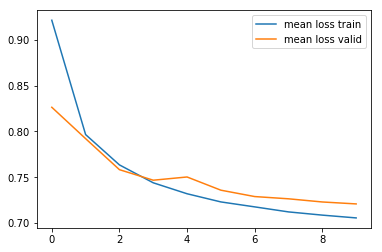

In [36]:
plt.plot(plot_loss_train, label='mean loss train')
plt.plot(plot_loss_valid, label='mean loss valid')
plt.legend()
plt.show()

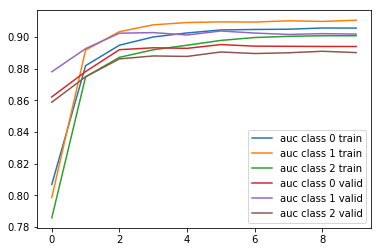

In [37]:
plt.plot(plot_auc_0_train, label='auc class 0 train')
plt.plot(plot_auc_1_train, label='auc class 1 train')
plt.plot(plot_auc_2_train, label='auc class 2 train')
plt.plot(plot_auc_0_valid, label='auc class 0 valid')
plt.plot(plot_auc_1_valid, label='auc class 1 valid')
plt.plot(plot_auc_2_valid, label='auc class 2 valid')
plt.legend()
plt.show()

**3.7) (5 points) ** The benefit of convolutional sequence model is that they are easier to interpret later. 
Use matplotlib and plt.imshow(), to visualize the filters of the first layer convolution that you have: 

(hint: an example, if the model is named model and the first layer of convolution is accessible via model.convnet1, the following code can give you those filters):
kernels = [k[0].data.numpy() for k in model.convnet1.weight])

**Note: It's ok if your model didn't converge at all. Just show the visualizations!**

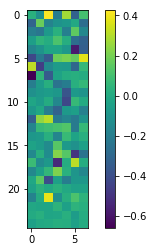

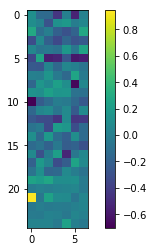

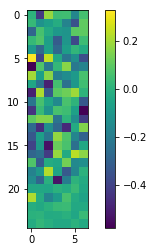

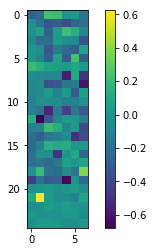

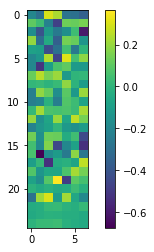

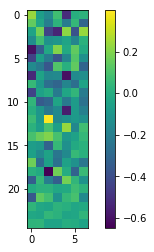

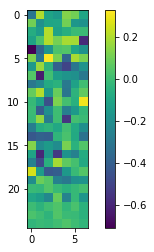

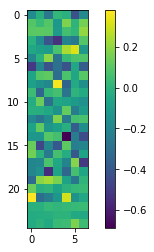

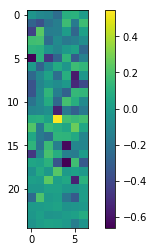

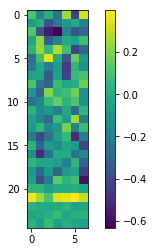

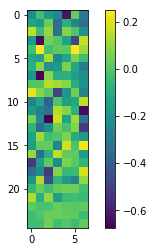

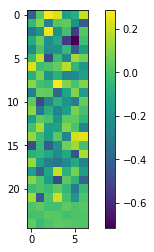

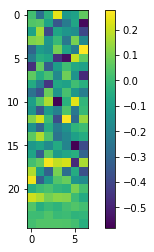

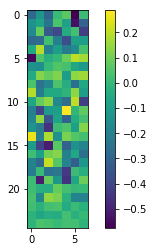

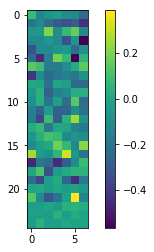

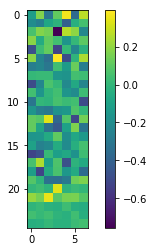

In [38]:
kernels = [k[0].data.numpy() for k in model.convnet1.weight]
for i in range(0, len(kernels)):
    plt.imshow(kernels[i]); plt.colorbar(); plt.show()

**3.8)(10 points)** Now, provide a second sequence classification model based on LSTMs. Build a simple LSTM model that takes as input the (25 x Len(s)) array, and ends with a softmax over 3 classees. 

The rest of your experimental setting should be the same as section 3.6. 

At each epoch, compute Average NLL loss and one AUC score per class i.e. 3 AUC scores on both train and validation set (hint: look at solutions to HW1 Q.4.2 for AUC and model details.)

Plot your validation and train loss over different epochs, and also print the AUCs on train and validation sets.

NOTE: At some point in your back-propagation, you may get an error which needs you to set a parameter retain_graph to be true, to solve. Advance warnings if you encounter that, and your solution will be: loss.backward(retain_graph=True)

In [7]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init
import torch.optim as optim
torch.manual_seed(1)
use_cuda = 0
from sklearn.metrics import roc_auc_score

def convert_cuda(obj):
    if use_cuda:
        if isinstance(obj, tuple):
            return tuple(cuda(o) for o in obj)
        elif isinstance(obj, list):
            return list(cuda(o) for o in obj)
        elif hasattr(obj, 'cuda'):
            return obj.cuda()
    return obj

def init_weights(module):
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)

def prepare_sequence_for_lstm(seqList, bix):
    batchNump = np.zeros((seqList[0].shape[0], len(bix), seqList[0].shape[1]), dtype=float);
    for iix, i in enumerate(bix):
        batchNump[:,iix,:] = seqList[i]
    seqtensor = torch.from_numpy(batchNump).cuda() if use_cuda else torch.from_numpy(batchNump)
    return autograd.Variable(seqtensor).float()

class SimpleLSTMClassifier(nn.Module):
    def __init__(self, input_dim=25, hidden_dim=32, output_dims=3, batchsize=16):
        super(SimpleLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.batchsize = batchsize
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim)
        self.hidden = self.init_hidden()
        self.fc = nn.Linear(hidden_dim, output_dims)
        self.flatSize = self.hidden_dim
        self.softmax = nn.Softmax()

    def init_hidden(self):
        if use_cuda:
            return autograd.Variable(torch.zeros(1, self.batchsize, self.hidden_dim).cuda()), autograd.Variable(torch.zeros( 1, self.batchsize, self.hidden_dim).cuda())
        else:
            return autograd.Variable(torch.zeros(1, self.batchsize, self.hidden_dim)), autograd.Variable(torch.zeros( 1, self.batchsize, self.hidden_dim))

    def forward(self, sequence):
#         print(sequence.size())
        lstm_out, self.hidden_out = self.lstm(sequence, self.hidden)
#         print(lstm_out.size())
#         out = F.relu(self.hidden_out[-1])
        out = F.relu(lstm_out[-1])
#         print(out.size())
        out = out.view(self.batchsize, self.flatSize)
        out = self.fc(out)
        out = self.softmax(out)
        return out
    
print('ready')


ready


In [8]:
batchsize = 64
model2 = SimpleLSTMClassifier(input_dim=25, hidden_dim=64, output_dims=3, batchsize=batchsize)  #Input dim is 25 - the alphabet, output dim is 3 
loss_function = nn.CrossEntropyLoss()
init_weights(model2)

use_cuda = 0
if use_cuda:
    model2 = model2.cuda()
    loss_function = loss_function.cuda()

optimizer = optim.Adam(model2.parameters(), lr=0.01)


In [9]:
plot_loss_train_lstm, plot_auc_0_train_lstm, plot_auc_1_train_lstm, plot_auc_2_train_lstm = [], [], [], []
plot_loss_valid_lstm, plot_auc_0_valid_lstm, plot_auc_1_valid_lstm, plot_auc_2_valid_lstm = [], [], [], []

for epoch in range(5):
    print('-----epoch:', epoch, '-----')
    print('Training: going over training data of size:', len(xtrain), ' in batches of size:', batchsize)
    model2.train()
    avgLossTrain = []
    avgLossValid = []
    ix_shuffle = np.arange(len(xtrain))
    np.random.shuffle(ix_shuffle)
    ypred =  np.zeros((len(ytrain), 3))
    batch_i = []
    batches = []
    for ix in ix_shuffle:
        batch_i.append(ix)
        if len(batch_i) == batchsize:
            batches.append(batch_i)
            batch_i = []   
    print('total batches:', len(batches))
    for ib, bix in enumerate(batches):
        model2.zero_grad() 
        modelout = model2(prepare_sequence_for_lstm(xtrain, bix))
        if use_cuda:
            targets = torch.LongTensor(torch.from_numpy(ytrain[bix].astype(np.int64))).cuda()
        else:
            targets = torch.LongTensor(torch.from_numpy(ytrain[bix].astype(np.int64)))
        targets = autograd.Variable(targets)
        loss = loss_function(modelout, targets)  
        loss.backward()
        ypred[bix, :] = modelout.data.numpy()
        if use_cuda:
            avgLossTrain.append(loss.cpu().data.numpy())
        else:
            avgLossTrain.append(loss.data.numpy())
        optimizer.step()
        if ib % 100 == 0:
            print(ib, 'batches done. Average train loss so far:', np.array(avgLossTrain).mean())
    mean_loss_train = np.array(avgLossTrain).mean()
    print('Average train loss:', mean_loss_train)
    auc_0 = roc_auc_score(y_true=(ytrain==0), y_score=ypred[:,0])
    auc_1 = roc_auc_score(y_true=(ytrain==1), y_score=ypred[:,1])
    auc_2 = roc_auc_score(y_true=(ytrain==2), y_score=ypred[:,2])
    print('AUC train [0] is:', auc_0)
    print('AUC train [1] is:', auc_1)
    print('AUC train [2] is:', auc_2)
    plot_loss_train_lstm.append(mean_loss_train)
    plot_auc_0_train_lstm.append(auc_0)
    plot_auc_1_train_lstm.append(auc_1)
    plot_auc_2_train_lstm.append(auc_2) 
    print('---validating---')
    ypredvalid = np.zeros((len(yvalid), 3))
    model2.eval()
    batches = []
    batch_i = []
    for ix in range(len(xvalid)):
        batch_i.append(ix)
        if len(batch_i) == batchsize:
            batches.append(batch_i)
            batch_i = []
    for ib, bix in enumerate(batches):
        modelout = model2(prepare_sequence_for_lstm(xvalid, bix))
        if use_cuda:
            targets = torch.LongTensor(torch.from_numpy(yvalid[bix].astype(np.int64))).cuda()
        else:
            targets = torch.LongTensor(torch.from_numpy(yvalid[bix].astype(np.int64)))
        targets = autograd.Variable(targets)
        ypredvalid[bix,:] = modelout.data.numpy()
        loss = loss_function(modelout, targets)  
        avgLossValid.append(loss.data.numpy())
    mean_loss_valid = np.array(avgLossValid).mean()
    print('Average valid loss:', mean_loss_valid)
    auc_0 = roc_auc_score(y_true=(yvalid==0), y_score=ypredvalid[:,0])
    auc_1 = roc_auc_score(y_true=(yvalid==1), y_score=ypredvalid[:,1])
    auc_2 = roc_auc_score(y_true=(yvalid==2), y_score=ypredvalid[:,2])
    print('AUC valid [0] is:', auc_0)
    print('AUC valid [1] is:', auc_1)
    print('AUC valid [2] is:', auc_2)
    plot_loss_valid_lstm.append(mean_loss_valid)
    plot_auc_0_valid_lstm.append(auc_0)
    plot_auc_1_valid_lstm.append(auc_1)
    plot_auc_2_valid_lstm.append(auc_2)
   

-----epoch: 0 -----
Training: going over training data of size: 70248  in batches of size: 64
total batches: 1097
0 batches done. Average train loss so far: 1.09827
100 batches done. Average train loss so far: 1.08635
200 batches done. Average train loss so far: 1.08627
300 batches done. Average train loss so far: 1.08569
400 batches done. Average train loss so far: 1.08404
500 batches done. Average train loss so far: 1.08281
600 batches done. Average train loss so far: 1.0825
700 batches done. Average train loss so far: 1.08179
800 batches done. Average train loss so far: 1.08099
900 batches done. Average train loss so far: 1.07995
1000 batches done. Average train loss so far: 1.07915
Average train loss: 1.07813
AUC train [0] is: 0.533720466631
AUC train [1] is: 0.534587984005
AUC train [2] is: 0.533172489539
---validating---
Average valid loss: 1.0692
AUC valid [0] is: 0.551902324481
AUC valid [1] is: 0.562140852254
AUC valid [2] is: 0.538557589366
-----epoch: 1 -----
Training: going

**3.9) (5 points)** What are some other architectures that you could be using in future work? List a few and in a few sentences discuss why they might be a good fit for this task. 

Answer:

There is a lot that can be done with tunning existing architectures, including depth, bi-directionality, size of linear layer, number of fully connected layers, allowing fully connected to be based on all lstm output not just the last layer, etc. 

Additionally, you can use attention model, which might give more interpretable results. 

Third direction would be to combine convolution and LSTM

Fourth direction would be to embedd the sub-sequences and then learn an LSTM/RNN/CNN on top of the embedding (instead of one-hot encodding). 

And many many more... 

**3.10)(5 points)** What are some other fine-tunning/regularizations/etc. that you could do in the future work, to improve the scores?

Answer:

Several possible answers including:

BatchNormalization, regularization via dropout, tunning fully connected layer depth and widths, connecting the fully connected layer to all the outputs of lstm instead of last step, etc. etc.

Also data augmentation might help improve scores: i.e. cropping the input randomly, adding small amount of noise, flipping some of the one-hot values randomly, adversarial training, etc. 